## Predicting Emotions of News Contents Using Sentiment Analysis

- In this question, we will apply sentiment analysis on financial news headlines from a given data set.

- By doing so, we can understand the emotion behind the headlines and predict whether the market is being positive or negative toward a stock.

In [1]:
###(1) Import the necessary library and load the news_data csv file.

In [2]:
import pandas as pd

In [3]:
news=pd.read_csv('Documents/assignment2/news_data.csv')
print (news.shape)
print (news.head())
print (news.columns.values)

(500, 4)
  ticker       date     time  \
0     fb  Jan-04-19  06:22PM   
1     fb  Jan-04-19  05:15PM   
2     fb  Jan-04-19  04:55PM   
3     fb  Jan-04-19  04:53PM   
4     fb  Jan-04-19  04:30PM   

                                            headline  
0  Facebook, Apple, Netflix, Amazon and Alphabet ...  
1  Earnings Reports for the Week of Jan. 7-11 (BB...  
2  COLUMN-Commentary: 2019 will be the year of mo...  
3                     3 Tech Trends to Watch in 2019  
4        Will Denver's tech growth continue in 2019?  
['ticker' 'date' 'time' 'headline']


In [4]:
###(2) Use VADER Sentiment Analyer and derive pos/neu/neg/compound sentiment scores for every news headlines.
###(3) Merge the sentiment outputs to the existing data set. 
### As a result, you will have 8 cloumns in your data set such as ticker, date, time, headline, pos,neu,neg,compound.

In [5]:
# NLTK VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amarisefthimiou/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Iterate through the headlines and get the polarity scores
scores = [vader.polarity_scores(headline) for headline in news.headline]
# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames
news = news.join(scores_df)
# Convert the date column from string to a date
#news['date'] = pd.to_datetime(news.date).dt.date
print (news.shape)
print (news.head())
print (news.columns.values)

(500, 8)
  ticker       date     time  \
0     fb  Jan-04-19  06:22PM   
1     fb  Jan-04-19  05:15PM   
2     fb  Jan-04-19  04:55PM   
3     fb  Jan-04-19  04:53PM   
4     fb  Jan-04-19  04:30PM   

                                            headline  neg    neu    pos  \
0  Facebook, Apple, Netflix, Amazon and Alphabet ...  0.0  0.631  0.369   
1  Earnings Reports for the Week of Jan. 7-11 (BB...  0.0  1.000  0.000   
2  COLUMN-Commentary: 2019 will be the year of mo...  0.0  1.000  0.000   
3                     3 Tech Trends to Watch in 2019  0.0  1.000  0.000   
4        Will Denver's tech growth continue in 2019?  0.0  0.698  0.302   

   compound  
0    0.4767  
1    0.0000  
2    0.0000  
3    0.0000  
4    0.3818  
['ticker' 'date' 'time' 'headline' 'neg' 'neu' 'pos' 'compound']


In [7]:
### (4) Visualize your outputs for one single day for one particular stock.
### Pick one of the tickers, say fb, and a certain date, say 2019 Jan 03, and 
### plot how the news sentiment (pos,neu,neg this time) changes over time within that day.
### you can generate separate plots for each sentiment category and overlay the plots all together at once.
### Although there's no one exact way to do this, such plot may work.

In [8]:
#pick fb.
news_fb=news[news['ticker']=='fb']
print (news_fb.shape)
print (news_fb.columns.values)
print (news_fb['date'].value_counts())

(200, 8)
['ticker' 'date' 'time' 'headline' 'neg' 'neu' 'pos' 'compound']
Sep-20-18    30
Sep-19-18    25
Sep-18-18    22
Jan-04-19    21
Jan-02-19    21
Sep-21-18    21
Jan-03-19    20
Dec-31-18    15
Dec-28-18    11
Dec-30-18     6
Jan-01-19     3
Dec-29-18     3
Sep-22-18     2
Name: date, dtype: int64


In [9]:
#pick 01/03/2019.
news_fb_one_day=news_fb[news_fb['date']=='Jan-03-19']
print (news_fb_one_day.shape)
print (news_fb_one_day)

(20, 8)
   ticker       date     time  \
21     fb  Jan-03-19  10:59PM   
22     fb  Jan-03-19  05:45PM   
23     fb  Jan-03-19  05:32PM   
24     fb  Jan-03-19  05:24PM   
25     fb  Jan-03-19  04:10PM   
26     fb  Jan-03-19  03:26PM   
27     fb  Jan-03-19  03:14PM   
28     fb  Jan-03-19  01:36PM   
29     fb  Jan-03-19  01:31PM   
30     fb  Jan-03-19  12:25PM   
31     fb  Jan-03-19  10:42AM   
32     fb  Jan-03-19  10:21AM   
33     fb  Jan-03-19  10:08AM   
34     fb  Jan-03-19  09:58AM   
35     fb  Jan-03-19  09:48AM   
36     fb  Jan-03-19  09:34AM   
37     fb  Jan-03-19  09:12AM   
38     fb  Jan-03-19  09:07AM   
39     fb  Jan-03-19  08:04AM   
40     fb  Jan-03-19  06:00AM   

                                             headline    neg    neu    pos  \
21  [$$] Facebook Begins New Year in Fixer-Upper Mode  0.000  1.000  0.000   
22  Investors Are Focused Too Closely on Facebook ...  0.000  0.652  0.348   
23  [$$] Facebook Begins New Year in Fixer-Upper Mode  0.000  1.

In [10]:
#convert time to datetime format if necessary.
news_fb_one_day['time'] = pd.to_datetime(news_fb_one_day['time'])
print(news_fb_one_day.dtypes)
#sort the data by time.
news_fb_one_day=news_fb_one_day.sort_values(by='time')
print (news_fb_one_day)
print (news_fb_one_day.shape)

ticker              object
date                object
time        datetime64[ns]
headline            object
neg                float64
neu                float64
pos                float64
compound           float64
dtype: object
   ticker       date                time  \
40     fb  Jan-03-19 2023-06-05 06:00:00   
39     fb  Jan-03-19 2023-06-05 08:04:00   
38     fb  Jan-03-19 2023-06-05 09:07:00   
37     fb  Jan-03-19 2023-06-05 09:12:00   
36     fb  Jan-03-19 2023-06-05 09:34:00   
35     fb  Jan-03-19 2023-06-05 09:48:00   
34     fb  Jan-03-19 2023-06-05 09:58:00   
33     fb  Jan-03-19 2023-06-05 10:08:00   
32     fb  Jan-03-19 2023-06-05 10:21:00   
31     fb  Jan-03-19 2023-06-05 10:42:00   
30     fb  Jan-03-19 2023-06-05 12:25:00   
29     fb  Jan-03-19 2023-06-05 13:31:00   
28     fb  Jan-03-19 2023-06-05 13:36:00   
27     fb  Jan-03-19 2023-06-05 15:14:00   
26     fb  Jan-03-19 2023-06-05 15:26:00   
25     fb  Jan-03-19 2023-06-05 16:10:00   
24     fb  Jan-03-19 2

/var/folders/h8/hss13lq96dl3q2h23z2v29280000gn/T/ipykernel_87392/1733771323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_fb_one_day['time'] = pd.to_datetime(news_fb_one_day['time'])


In [11]:
#use time variable as index for this data.
news_fb_one_day=news_fb_one_day.set_index('time')
print (news_fb_one_day)
print (news_fb_one_day.shape)
print (news_fb_one_day.columns.values)

                    ticker       date  \
time                                    
2023-06-05 06:00:00     fb  Jan-03-19   
2023-06-05 08:04:00     fb  Jan-03-19   
2023-06-05 09:07:00     fb  Jan-03-19   
2023-06-05 09:12:00     fb  Jan-03-19   
2023-06-05 09:34:00     fb  Jan-03-19   
2023-06-05 09:48:00     fb  Jan-03-19   
2023-06-05 09:58:00     fb  Jan-03-19   
2023-06-05 10:08:00     fb  Jan-03-19   
2023-06-05 10:21:00     fb  Jan-03-19   
2023-06-05 10:42:00     fb  Jan-03-19   
2023-06-05 12:25:00     fb  Jan-03-19   
2023-06-05 13:31:00     fb  Jan-03-19   
2023-06-05 13:36:00     fb  Jan-03-19   
2023-06-05 15:14:00     fb  Jan-03-19   
2023-06-05 15:26:00     fb  Jan-03-19   
2023-06-05 16:10:00     fb  Jan-03-19   
2023-06-05 17:24:00     fb  Jan-03-19   
2023-06-05 17:32:00     fb  Jan-03-19   
2023-06-05 17:45:00     fb  Jan-03-19   
2023-06-05 22:59:00     fb  Jan-03-19   

                                                              headline    neg  \
time            

/var/folders/h8/hss13lq96dl3q2h23z2v29280000gn/T/ipykernel_87392/3278174460.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  plot_day = news_fb_one_day.drop(['ticker','date','headline','compound'], 1)


['neg' 'neu' 'pos']
                       neg    neu    pos
time                                    
2023-06-05 06:00:00  0.000  1.000  0.000
2023-06-05 08:04:00  0.000  1.000  0.000
2023-06-05 09:07:00  0.000  0.846  0.154
2023-06-05 09:12:00  0.000  1.000  0.000
2023-06-05 09:34:00  0.426  0.574  0.000
2023-06-05 09:48:00  0.000  1.000  0.000
2023-06-05 09:58:00  0.000  1.000  0.000
2023-06-05 10:08:00  0.000  0.784  0.216
2023-06-05 10:21:00  0.231  0.769  0.000
2023-06-05 10:42:00  0.000  1.000  0.000
2023-06-05 12:25:00  0.000  0.661  0.339
2023-06-05 13:31:00  0.000  1.000  0.000
2023-06-05 13:36:00  0.147  0.853  0.000
2023-06-05 15:14:00  0.000  0.662  0.338
2023-06-05 15:26:00  0.000  0.656  0.344
2023-06-05 16:10:00  0.000  0.878  0.122
2023-06-05 17:24:00  0.000  1.000  0.000
2023-06-05 17:32:00  0.000  1.000  0.000
2023-06-05 17:45:00  0.000  0.652  0.348
2023-06-05 22:59:00  0.000  1.000  0.000
['negative' 'neutral' 'positive']


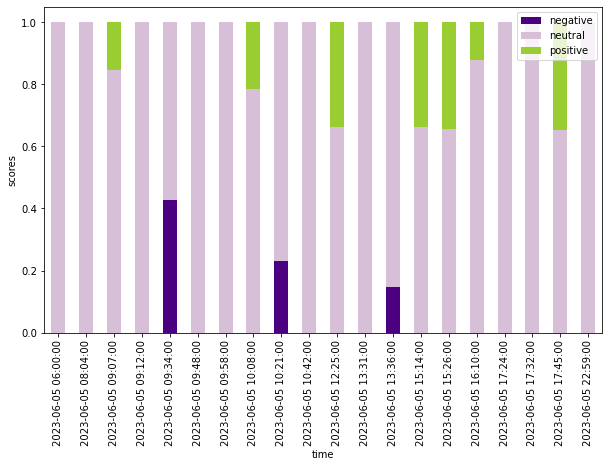

In [12]:
from matplotlib import pyplot as plt

three_colors = ["indigo","thistle", "yellowgreen"]
# Drop the columns that will not be used for the visualation.
plot_day = news_fb_one_day.drop(['ticker','date','headline','compound'], 1)
print (plot_day.columns.values)
print (plot_day)
# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'neutral', 'positive']
print (plot_day.columns.values)
# Plot a stacked bar chart
plot_day.plot.bar(stacked = True, figsize=(10, 6), color = three_colors)
plt.ylabel("scores");

In [13]:
### (5) Visualize your outputs to see how the news sentiment of each ticker changes over time.  
### Generate time trend plot for the average of compound scores for both tickers at a daily-level. 
### X axis should be date from the oldest to the newest & Y axis should be the average of compound scores.



In [14]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

#convert time to datetime format if necessary.
news['date'] = pd.to_datetime(news['date'])

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = news.groupby(['date', 'ticker']).mean()
print (mean_c)
print (mean_c.shape)
print (mean_c.columns.values)

                        neg       neu       pos  compound
date       ticker                                        
2018-09-18 fb      0.104864  0.843682  0.051455 -0.052564
           tsla    0.112875  0.807688  0.079437 -0.085650
2018-09-19 fb      0.072920  0.805560  0.121640  0.057568
           tsla    0.066366  0.879610  0.054000 -0.025949
2018-09-20 fb      0.059567  0.870233  0.070200  0.018447
           tsla    0.067304  0.762609  0.170087  0.148757
2018-09-21 fb      0.052762  0.886381  0.060857  0.014310
           tsla    0.102800  0.818600  0.078600 -0.049575
2018-09-22 fb      0.000000  0.899000  0.101000  0.255300
2018-11-16 tsla    0.022000  0.931810  0.046190  0.026714
2018-11-17 tsla    0.000000  0.916500  0.083500  0.190900
2018-11-18 tsla    0.000000  0.956667  0.043333  0.067433
2018-11-19 tsla    0.093263  0.821105  0.085632  0.002384
2018-11-20 tsla    0.014154  0.941308  0.044538  0.066862
2018-11-21 tsla    0.056091  0.821273  0.122636  0.162045
2018-11-22 tsl

In [15]:
# Unstack the column ticker
mean_c = mean_c.unstack('ticker')
print ("after",mean_c)

after                  neg                 neu                 pos            \
ticker            fb      tsla        fb      tsla        fb      tsla   
date                                                                     
2018-09-18  0.104864  0.112875  0.843682  0.807688  0.051455  0.079437   
2018-09-19  0.072920  0.066366  0.805560  0.879610  0.121640  0.054000   
2018-09-20  0.059567  0.067304  0.870233  0.762609  0.070200  0.170087   
2018-09-21  0.052762  0.102800  0.886381  0.818600  0.060857  0.078600   
2018-09-22  0.000000       NaN  0.899000       NaN  0.101000       NaN   
2018-11-16       NaN  0.022000       NaN  0.931810       NaN  0.046190   
2018-11-17       NaN  0.000000       NaN  0.916500       NaN  0.083500   
2018-11-18       NaN  0.000000       NaN  0.956667       NaN  0.043333   
2018-11-19       NaN  0.093263       NaN  0.821105       NaN  0.085632   
2018-11-20       NaN  0.014154       NaN  0.941308       NaN  0.044538   
2018-11-21       NaN  0.056091  

In [16]:
# Get the cross-section of compound in the 'columns' axis
mean_c = mean_c.xs("compound", axis="columns")
mean_c = mean_c.sort_index()
print (mean_c)

ticker            fb      tsla
date                          
2018-09-18 -0.052564 -0.085650
2018-09-19  0.057568 -0.025949
2018-09-20  0.018447  0.148757
2018-09-21  0.014310 -0.049575
2018-09-22  0.255300       NaN
2018-11-16       NaN  0.026714
2018-11-17       NaN  0.190900
2018-11-18       NaN  0.067433
2018-11-19       NaN  0.002384
2018-11-20       NaN  0.066862
2018-11-21       NaN  0.162045
2018-11-22       NaN -0.637260
2018-11-23       NaN  0.000000
2018-11-25       NaN  0.046725
2018-11-26       NaN -0.103317
2018-12-28 -0.120973       NaN
2018-12-29 -0.024933       NaN
2018-12-30  0.173817       NaN
2018-12-31 -0.009920       NaN
2019-01-01  0.291667       NaN
2019-01-02  0.080748 -0.046998
2019-01-03  0.095820 -0.131786
2019-01-04  0.015771  0.060776


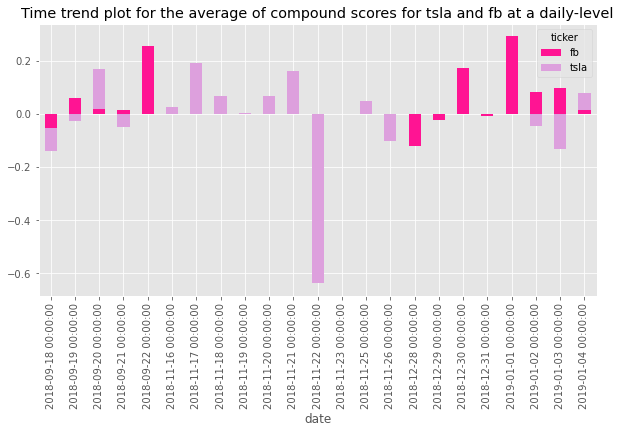

In [17]:
avg_scores = news.groupby(['date', 'ticker'])['compound'].mean().unstack()

TITLE = "Time trend plot for the average of compound scores for tsla and fb at a daily-level"
COLORS = ["deeppink","plum"]

avg_scores.plot.bar(stacked=True, figsize=(10,5), title = TITLE, color = COLORS)

plt.show()